In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [16]:
file_path = r'C:\Users\Kristina Vrdoljak\Desktop\AppCogSci\data science\Week 3\2nd homework assignment-20240104\X_clean.csv'
df = pd.read_csv(file_path)
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_male,LunchType_standard
0,0,female,2,1,standard,1,1,1,10,3.0,1,1,71,71,74,0,1
1,1,female,2,5,standard,1,1,2,10,0.0,2,0,69,90,88,0,1
2,2,female,1,3,standard,1,2,2,10,4.0,1,1,87,93,91,0,1
3,3,male,0,0,free/reduced,1,1,0,3,1.0,2,0,45,56,42,1,0
4,4,male,2,5,standard,1,1,2,10,0.0,1,0,76,78,75,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,29112,female,3,2,standard,1,2,2,3,2.0,1,0,59,61,65,0,1
29113,29113,male,4,2,standard,1,2,1,3,1.0,0,0,58,53,51,1,1
29114,29114,female,2,2,free/reduced,0,1,2,3,1.0,0,0,61,70,67,0,0
29115,29115,female,3,0,standard,0,1,1,3,3.0,1,0,82,90,93,0,1


2. a) Find the mean, median and average scores in mathematics, reading and writing. <br>
   b) Find the mean, median and average scores for males and females.<br>
   c) What is the coefficient of variation of the scores? <br>

In [17]:
mean_score=df[['MathScore','ReadingScore','WritingScore']].mean()
median_score=df[['MathScore','ReadingScore','WritingScore']].median()

print('Mean score:',mean_score)
print('Median score:',median_score)


std_scores = df[['MathScore', 'ReadingScore', 'WritingScore']].std()


mean_scores = df[['MathScore', 'ReadingScore', 'WritingScore']].mean()

cv_scores = (std_scores / mean_scores) * 100


print("Coefficient of variation for scores:")
print(cv_scores)

Mean score: MathScore       66.559948
ReadingScore    69.390081
WritingScore    68.429337
dtype: float64
Median score: MathScore       67.0
ReadingScore    70.0
WritingScore    69.0
dtype: float64
Coefficient of variation for scores:
MathScore       23.053283
ReadingScore    21.271326
WritingScore    22.574845
dtype: float64


3. a) Use a statistical test to test the hypothesis:<br>
H0: the mean mathematical scores of females and males are equal.



In [22]:
from statsmodels.stats.weightstats import ztest as ztest

female = df.query('Gender == "female"')
male = df.query('Gender == "male"')

female_sample = female.sample(n=100, random_state=1)
male_sample = male.sample(n=100, random_state=1)

stat, p = f_oneway(female_sample['MathScore'],male_sample['MathScore'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The mean mathematical scores of females and males are equal.')
else:
    print('The mean mathematical scores of females and males are not equal.')

stat=16.169, p=0.000
The mean mathematical scores of females and males are not equal.


4. a) Use a statistical test to test the hypothesis:<br>
   H0 Gender did not affect the writing scores.<br>
   H1 Gender affected the writing score.<br>

In [24]:
import scipy.stats as stats
import pandas as pd


male_scores = df[df['Gender'] == 'Male']['WritingScore']
female_scores = df[df['Gender'] == 'Female']['WritingScore']


t_statistic, p_value = stats.ttest_ind(male_scores, female_scores, equal_var=False)


print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')


if p_value < 0.05:
    print('Gender affected the writing score')
else:
    print('Gender did not affect the writing scores.')


T-Statistic: nan
P-Value: nan
Gender did not affect the writing scores.


5. a) Statisticaly test the distribuitions of female and male scores across the three scores columns.<br>
b) Plot the distributions for each of the separate scores in both genders. <br>

T-test p-value for MathScore: nan
T-test p-value for ReadingScore: nan
T-test p-value for WritingScore: nan


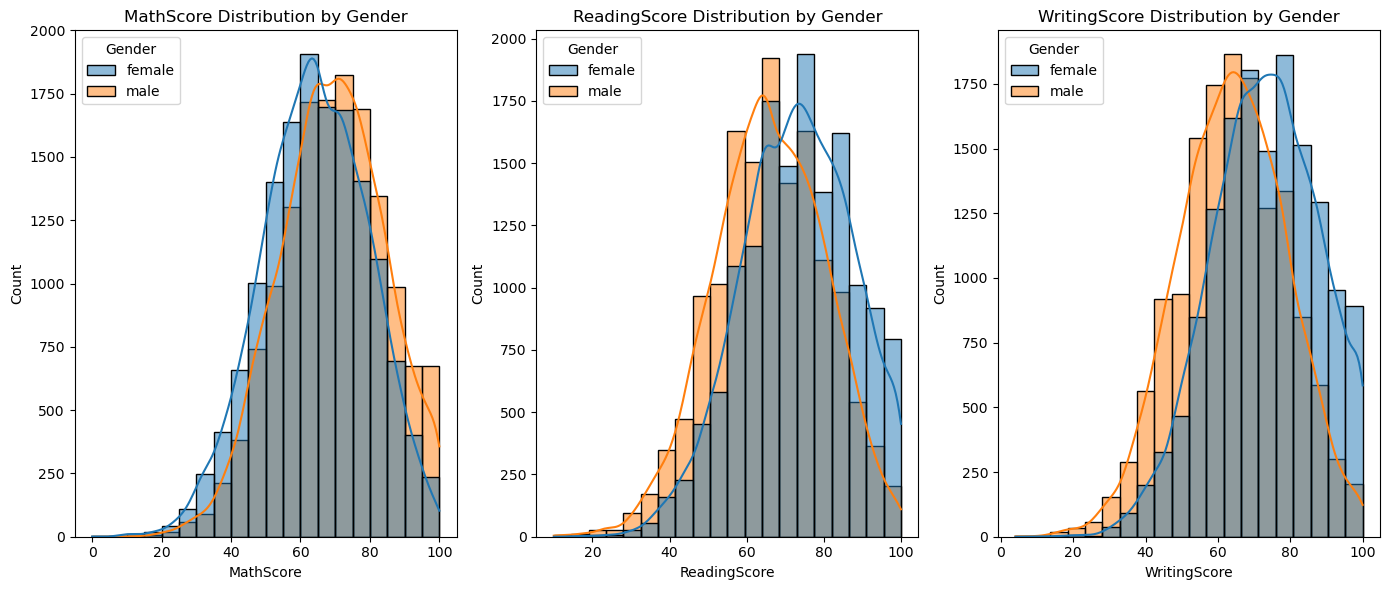

In [20]:
from scipy.stats import ttest_ind


female_scores = df[df["Gender"] == 1][["MathScore", "ReadingScore", "WritingScore"]]
male_scores =df[df["Gender"] == 0][["MathScore", "ReadingScore", "WritingScore"]]

for score_column in ["MathScore", "ReadingScore", "WritingScore"]:
    _, p_value = ttest_ind(female_scores[score_column], male_scores[score_column])
    print(f"T-test p-value for {score_column}: {p_value}")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))


plt.subplot(1, 3, 1)
sns.histplot(data=df, x='MathScore', hue='Gender', kde=True, bins=20)
plt.title('MathScore Distribution by Gender')


plt.subplot(1, 3, 2)
sns.histplot(data=df, x='ReadingScore', hue='Gender', kde=True, bins=20)
plt.title('ReadingScore Distribution by Gender')


plt.subplot(1, 3, 3)
sns.histplot(data=df, x='WritingScore', hue='Gender', kde=True, bins=20)
plt.title('WritingScore Distribution by Gender')

plt.tight_layout()
plt.show()